In [1]:
import pandas as pd
import numpy as np

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, History

In [2]:
get_image_data = ImageDataGenerator(rescale=1./255, validation_split=0.20)

path_name = '/Users/alisongarrett/Documents/GitHub/metis/Deep Learning/Project/data/train'

image_data_train = get_image_data.flow_from_directory(path_name, 
                                                      subset='training', 
                                                      target_size=(256,256), 
                                                      batch_size=256,            #32
                                                      seed=42,
                                                      class_mode='binary')

image_data_validate = get_image_data.flow_from_directory(path_name, 
                                                         subset='validation', 
                                                         target_size=(256,256), 
                                                         batch_size=256,         #32
                                                         seed=42,
                                                         class_mode='binary')



Found 5452 images belonging to 2 classes.
Found 1362 images belonging to 2 classes.


In [3]:
get_image_data = ImageDataGenerator(rescale=1./255)
path_name = '/Users/alisongarrett/Documents/GitHub/metis/Deep Learning/Project/data/test'

image_data_test = get_image_data.flow_from_directory(path_name, 
                                                     target_size=(256,256),
                                                     seed=42,
                                                     class_mode='binary',
                                                     batch_size=256)             #32



Found 884 images belonging to 2 classes.


In [4]:
from tensorflow.keras.applications import VGG16

In [5]:
base_vgg16 = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3)
)

2021-12-01 20:04:22.932512: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
base_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [7]:
for l in base_vgg16.layers:
    l.trainable = False

In [8]:
model = Sequential()
            
model.add(base_vgg16)    # base_resnet50       

model.add(Flatten())            
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))            
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop', #Adam
              metrics=['accuracy'])

In [10]:
# callback = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
history = History()

In [11]:
history = model.fit(
    image_data_train,
#     steps_per_epoch=100,
    epochs=50,
    validation_data=image_data_validate,
#     validation_steps=20, 
    callbacks=[history]) #callback

2021-12-01 20:04:25.836009: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
22/22 [==============================] - 629s 30s/step - loss: 1.6983 - accuracy: 0.5464 - val_loss: 0.6892 - val_accuracy: 0.5029
Epoch 2/50
22/22 [==============================] - 628s 29s/step - loss: 0.7241 - accuracy: 0.5537 - val_loss: 0.6746 - val_accuracy: 0.5771
Epoch 3/50
22/22 [==============================] - 624s 28s/step - loss: 0.6703 - accuracy: 0.5794 - val_loss: 0.6786 - val_accuracy: 0.6153
Epoch 4/50
22/22 [==============================] - 628s 29s/step - loss: 0.6656 - accuracy: 0.5785 - val_loss: 0.6572 - val_accuracy: 0.5793
Epoch 5/50
22/22 [==============================] - 625s 29s/step - loss: 0.6478 - accuracy: 0.5802 - val_loss: 0.6557 - val_accuracy: 0.5771
Epoch 6/50
22/22 [==============================] - 629s 29s/step - loss: 0.6478 - accuracy: 0.5781 - val_loss: 0.6496 - val_accuracy: 0.5771
Epoch 7/50
22/22 [==============================] - 622s 28s/step - loss: 0.6732 - accuracy: 0.5679 - val_loss: 0.6491 - val_accuracy: 0.6035
Epoch 

In [12]:
model.save('model_vgg16_256_2') #model_resnet50

2021-12-02 04:42:38.777044: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model_vgg16_256_2/assets


In [13]:
prediction = model.predict(image_data_test, verbose=1)

4/4 [==============================] - 83s 19s/step


In [14]:
prediction.shape

(884, 1)

In [15]:
image_data_test.class_indices

{'edible': 0, 'poisonous': 1}

In [16]:
actual = np.concatenate((np.zeros((472,1)), np.ones((412,1))), axis=0)

In [17]:
actual.shape

(884, 1)

In [18]:
# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# modeling imports
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, f1_score, roc_curve

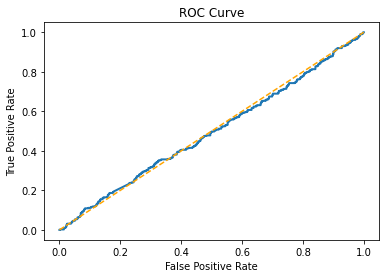

In [19]:
fpr, tpr, thresholds = roc_curve(actual, prediction)

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='orange',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve');

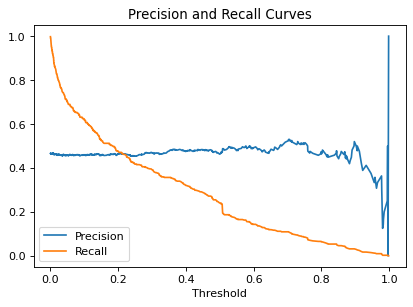

In [20]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(actual, prediction)

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='Precision')
plt.plot(threshold_curve, recall_curve[1:], label='Recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold');
plt.title('Precision and Recall Curves');

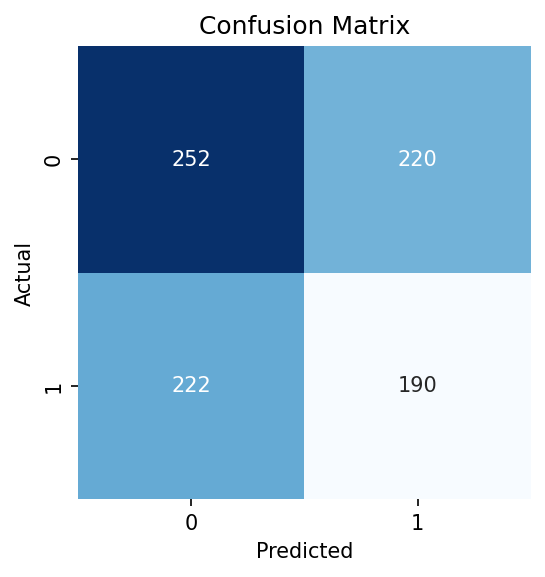

In [29]:
confusion = confusion_matrix(actual, prediction>0.22)
plt.figure(dpi=150)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True, cbar=False, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix');

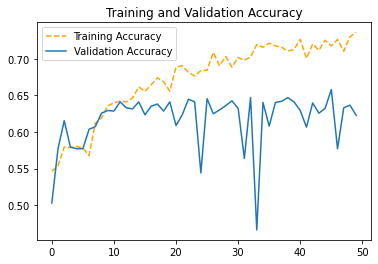

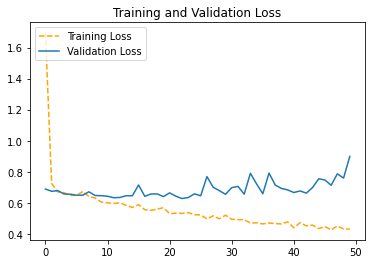

In [22]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(len(accuracy)), accuracy, c='orange',ls='--', label='Training Accuracy')
plt.plot(range(len(accuracy)), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='upper left')

plt.figure()

plt.plot(range(len(accuracy)), loss, c='orange',ls='--', label='Training Loss')
plt.plot(range(len(accuracy)), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper left')

plt.show()

In [30]:
print('CONV2D:')
print('Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(actual, prediction>0.22), roc_auc_score(actual, prediction>0.4))) 

CONV2D:
Test F1: 0.462, Test AUC: 0.507
